In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random #to generate random numbers 

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data() 
print("x_train:" + str(x_train.shape))
print("y_train:" + str(y_train.shape))
print("x_test:" + str(x_test.shape))
print("y_test:" + str(y_test.shape))

Using TensorFlow backend.


x_train:(60000, 28, 28)
y_train:(60000,)
x_test:(10000, 28, 28)
y_test:(10000,)


index=26153


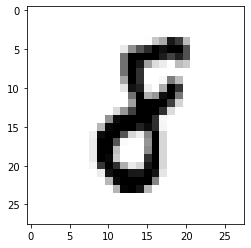

In [3]:
import matplotlib.pyplot as plt
index = random.randint(0,60000)
print("index=" +str(index))               #random index
plt.imshow(x_train[index], cmap = plt.cm.binary) #plot the random image at the index given using gray scale(the color map)
plt.show()

In [4]:
#reshape the matrices to (n, 28*28) and normalize
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

x_train = keras.utils.normalize(x_train,axis=1) #only normalise the x
x_test = keras.utils.normalize(x_test,axis=1)

In [5]:
#creating a model with 2 hidden layers each with 128 nodes and a softmax output layer of 10 nodes

model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics =['accuracy'] ) 
#using sparse crossentroy as we have integer labels instead of one hot encoding  



In [6]:
model.fit(x_train,y_train, epochs = 5) #to fit the model 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3351 - accuracy: 0.9047
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1430 - accuracy: 0.9566
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0962 - accuracy: 0.9709
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0716 - accuracy: 0.9780
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0555 - accuracy: 0.9826


In [7]:
test_loss, test_acc = model.evaluate(x_test,y_test)  #evaluate model

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0796 - accuracy: 0.9753


In [8]:
print(str(test_acc))

0.9753


In [9]:
model.save('mnist_number.model') #save the model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_number.model\assets


## To use own data to test

In [10]:
#use opencv to resize and grayscale the image 
import cv2

# function to process the   
def img_process(file):
    # size of image thats used, in this case 28*28
    img_size = 28   
    #read the image in grayscale
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    #reshape the image
    img = cv2.resize(img, (img_size,img_size))
    return img
img = cv2.imread("C:\Users\krishthek\Desktop\number_test.jpg", cv2.IMREAD_GRAYSCALE)
print(cv2.imshow('image',img))    
cv2.waitKey(0)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-10-8d4faff61bd2>, line 13)

In [ ]:
prediction = model.predict_classes([img_process("C:/Users/krishthek/Desktop/number_test.jpg")])
print(prediction)